In [1]:
# Tuesday-WorkingHours.pcap_ISCX.csv

#  Label
# BENIGN         432074
# FTP-Patator      7938
# SSH-Patator      5897

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as snsdfn.to_csv('all_data.csv', encoding='utf-8')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  Int64  
 1    Flow Duration                445909 non-null  Int64  
 2    Total Fwd Packets            445909 non-null  Int64  
 3    Total Backward Packets       445909 non-null  Int64  
 4   Total Length of Fwd Packets   445909 non-null  Int64  
 5    Total Length of Bwd Packets  445909 non-null  Int64  
 6    Fwd Packet Length Max        445909 non-null  Int64  
 7    Fwd Packet Length Min        445909 non-null  Int64  
 8    Fwd Packet Length Mean       445909 non-null  Float64
 9    Fwd Packet Length Std        445909 non-null  Float64
 10  Bwd Packet Length Max         445909 non-null  Int64  
 11   Bwd Packet Length Min        445909 non-null  Int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [3]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

3405      BENIGN
83598     BENIGN
394675    BENIGN
413434    BENIGN
306364    BENIGN
252856    BENIGN
285648    BENIGN
129154    BENIGN
132999    BENIGN
293785    BENIGN
Name:  Label, dtype: string

In [4]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64

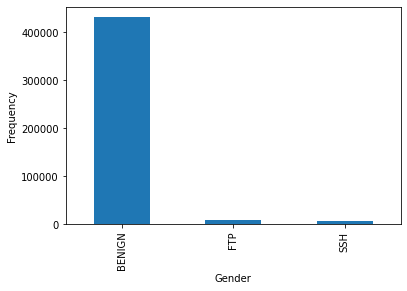

In [5]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2], ['BENIGN', 'FTP', 'SSH'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.04425118129483818
(445909, 76)
(445909, 76) 627039040.0
0 --- 65505.0
1 --- 119999976.0
2 --- 206446.0
3 --- 276072.0
4 --- 2428415.0
5 --- 627000000.0
6 --- 24820.0
7 --- 2065.0
8 --- 4672.0
9 --- 5398.072265625
10 --- 13140.0
11 --- 2896.0
12 --- 3735.73681640625
13 --- 4113.240234375
14 --- 120000000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 120000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 84400000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 82600000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 0.0
31 --- 0.0
32 --- 4225596.0
33 --- 5521440.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1408.0
37 --- 24820.0
38 --- 3337.142822265625
39 --- 3811.85498046875
40 --- 14500000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 0.0
48 --- 1.0
49 --- 35.0
50 --- 3893.333251953125
51 --- 4672.0
52 --- 3735.73681640625
53 --- 4225596.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
58 --- 0.0
59 -

In [6]:
dfn.to_csv('all_data.csv', encoding='utf-8')

In [8]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(312136, 76) 312136 (133773, 76) 133773


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [9]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)

(312136, 76) (312136,)


In [11]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,35):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,35), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

34
34


No handles with labels found to put in legend.


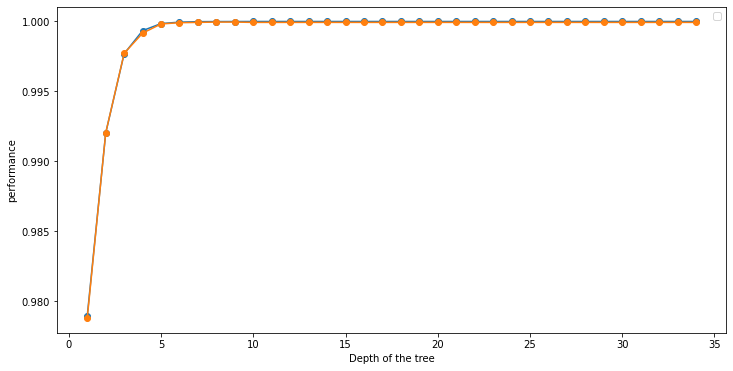

In [13]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [14]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.9999476725497671
0.9999476725497671
0.9994077222395438


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [15]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

[(0.5946952603052997, ' Destination Port'),
 (0.33949847542201333, ' Init_Win_bytes_backward'),
 (0.04682379144213778, ' Fwd Packet Length Mean'),
 (0.015311547299837438, 'Total Length of Fwd Packets'),
 (0.0015850246025350128, ' Fwd IAT Min'),
 (0.0007192763402126072, ' Bwd IAT Max'),
 (0.00048166151131468654, ' min_seg_size_forward'),
 (0.0002927458619196024, ' Flow IAT Min'),
 (0.00025406321475939506, ' Packet Length Variance'),
 (0.00012703160737969756, ' Total Fwd Packets'),
 (0.00010244484466104634, ' Fwd IAT Std'),
 (9.935015664524405e-05, ' Flow IAT Mean'),
 (9.327391284341693e-06, ' Flow Duration'),
 (0.0, 'Subflow Fwd Packets'),
 (0.0, 'Init_Win_bytes_forward'),
 (0.0, 'Idle Mean'),
 (0.0, 'Fwd Packets/s'),
 (0.0, 'Fwd PSH Flags'),
 (0.0, 'Fwd IAT Total'),
 (0.0, 'Fwd Avg Bytes/Bulk'),
 (0.0, 'FIN Flag Count'),
 (0.0, 'Bwd Packet Length Max'),
 (0.0, 'Bwd IAT Total'),
 (0.0, 'Bwd Avg Bulk Rate'),
 (0.0, 'Active Mean'),
 (0.0, ' act_data_pkt_fwd'),
 (0.0, ' URG Flag Count'),
 

In [16]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.9999476725497671
0.9999476725497671
0.9994077222395438


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [17]:
print('----------------Random Forest Regressor--------')

----------------Random Forest Regressor--------


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

[(0.7053599493679655, ' Destination Port'),
 (0.2648604279693536, ' Init_Win_bytes_backward'),
 (0.015687292238649737, ' Avg Fwd Segment Size'),
 (0.00397666307028918, ' Packet Length Std'),
 (0.003660814921140721, ' Fwd Packet Length Mean'),
 (0.001330645614872337, ' Subflow Fwd Bytes'),
 (0.001321344847025309, ' Bwd IAT Min'),
 (0.0012995041476621225, 'Total Length of Fwd Packets'),
 (0.0008018617795170623, ' Fwd IAT Min'),
 (0.00039792711844476405, ' Flow IAT Min'),
 (0.00023860192518091911, ' Fwd Packet Length Std'),
 (0.00015332693829080122, 'Bwd IAT Total'),
 (0.00014974138796884892, 'Fwd IAT Total'),
 (0.00012557259335638677, ' Fwd IAT Mean'),
 (9.975780362592652e-05, 'Fwd Packets/s'),
 (7.484510033938903e-05, ' Flow IAT Mean'),
 (7.378429004248195e-05, ' Packet Length Mean'),
 (6.807364035125222e-05, ' Fwd IAT Std'),
 (4.630659318903683e-05, ' min_seg_size_forward'),
 (4.173315429083319e-05, ' Bwd Packets/s'),
 (3.562696101297514e-05, ' Bwd IAT Std'),
 (3.541968761500051e-05, '

In [19]:
print(regressor.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.9988220175258525
0.9999476725497671
0.9994077222395438


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
